In [1]:
import tweepy

# Personal Keys needed to access Twitter API

In [2]:
consumer_key = '9g7ZRoL31dISnGlCNopfEysOq'
consumer_secret = 'zrCf3NHJ0SHEVuP2asFosjAKRGm7HdebkZgTNbtiSRR5k389nG'
access_token = '14093270-yMNg3eDdghzcQ70kXtIfdTTEK2dIpRblHlyEyom0N'
access_token_secret = 'MvE74KZBKSUpWRcZo04AY17hcv73sQpQmtkoED1RD1Up6'

# Setting up the API

In [3]:
auth = tweepy.OAuthHandler(consumer_key,
                           consumer_secret)
auth.set_access_token(access_token,
                      access_token_secret) 


In [4]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Searching for tweets using the hashtag Roe vs Wade

In [5]:
tweets = api.search(q='#roevswade',count=10000)

In [6]:
def print_tweets(tweets):
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
        print(f'{tweet.text}\n')

print_tweets(tweets)

Foreverlouisia1: RT @VegasVisions: Pssst. Ladies. Protesting not your cup of tea? Kick up your heels 👠 Relax. Learn from Iceland. #RoeVWade #RoeVWadeprotest…

qerese: RT @Corinna27049848: Participate in the Mother's Day Strike this week, as much as you're able to. No work. No unpaid labor. No shopping. No…

NaatoshiS: RT @VegasVisions: Pssst. Ladies. Protesting not your cup of tea? Kick up your heels 👠 Relax. Learn from Iceland. #RoeVWade #RoeVWadeprotest…

NewsJunkie60: RT @VegasVisions: Pssst. Ladies. Protesting not your cup of tea? Kick up your heels 👠 Relax. Learn from Iceland. #RoeVWade #RoeVWadeprotest…

LadyD85183160: RT @VegasVisions: Pssst. Ladies. Protesting not your cup of tea? Kick up your heels 👠 Relax. Learn from Iceland. #RoeVWade #RoeVWadeprotest…

abigailgordon21: RT @stephpcrogers: My choice MY Body #RoeVsWade #RoeVWadeprotest #MyBodyMyChoice #MyBodyMyRights #WomensRights https://t.co/4LTAnmI79A

lertsema: RT @PlanBianca: No matter what men think, abortion is a fact o

# Sentiment analysis on these tweets using Textblob's analyzer

In [7]:
from textblob import TextBlob

negative = 0
positive = 0
nuetral = 0
polarity = 0

for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        nuetral += 1
    if(analysis.sentiment.polarity < 0):
        negative += 1
    if(analysis.sentiment.polarity > 0):
        positive += 1
        
#positive = (positive / 250)
#negative = (negative / 250)
#nuetral = (nuetral / 250)

In [8]:
print("The number of positive tweets was : ",positive)

The number of positive tweets was :  29


In [9]:
print("The number of negative tweets was : ",negative)

The number of negative tweets was :  8


In [10]:
print("The number of nuetral tweets was : ",nuetral)

The number of nuetral tweets was :  63


In [11]:
import matplotlib.pyplot as plt
sentiment_titles = ['Positive','Negative','Nuetral']
sentiments = [positive,negative,nuetral]

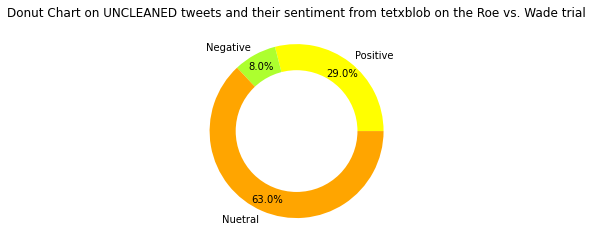

In [20]:
colors = ['#FFFF00', '#ADFF2F', '#FFA500']
plt.pie(sentiments, colors = colors, labels = sentiment_titles, autopct ="%1.1f%%",pctdistance = 0.85) # formatting of graph with %'s'

center_circle = plt.Circle((0, 0),0.70,fc='white') # creates circle centered at the origin with white color
fig = plt.gcf()

fig.gca().add_artist(center_circle) # adds circle

plt.title("Donut Chart on UNCLEANED tweets and their sentiment from tetxblob on the Roe vs. Wade trial") # title

plt.show()

# Sentiment analysis on the same tweets but using Naive Bayes Analyzer

In [13]:
from textblob.sentiments import NaiveBayesAnalyzer

positive = 0 # intiliaze counter variables
negative = 0

for tweet in tweets:
    analysis = TextBlob(tweet.text,analyzer=NaiveBayesAnalyzer())
    
    if(analysis.sentiment.classification == 'pos'):
        positive += 1
        
    if(analysis.sentiment.classification == 'neg'):
        negative += 1
        
print("The number of positive tweets was: " ,positive)
print("The number of negative tweets was: " ,negative)

The number of positive tweets was:  78
The number of negative tweets was:  22


In [14]:
sentiment_titles =['positive','negative']# to titles for graph
sentiments =[positive,negative]# to hold values, index of these two lists must be matching
colors = ['#FFFF00', '#ADFF2F'] # colors for graph RGB scaled id's

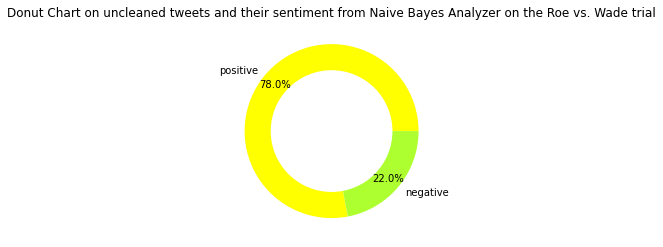

In [15]:
plt.pie(sentiments, colors = colors, labels = sentiment_titles, autopct ="%1.1f%%",pctdistance = 0.85) # formatting with percantages showing on graph

center_circle = plt.Circle((0, 0),0.70,fc='white') # origin at 0,0 size 0.7 and white color
fig = plt.gcf()

fig.gca().add_artist(center_circle) # add circle

plt.title("Donut Chart on uncleaned tweets and their sentiment from Naive Bayes Analyzer on the Roe vs. Wade trial") # title

plt.show()

# Comparison's to the different NLP's

- Textblob and NB(Naive Bayes) had a similiar reading on negative sentiment

- Textblob incorporates a nuetral option while NB does not, I think this is a little more telling because there are going to be tweets that just explain the situation, not neccesarily be positive or negative about the subject

# Clean the tweets and re-run the sentiment analysis to look for discepencies

In [16]:
import re

negative = 0 # initliaze all counters needed
positive = 0
nuetral = 0
polarity = 0

for tweet in tweets:
    tweet_text = tweet.text
    tweet_text = re.sub("@[A-Za-z0-9_]+","", tweet_text) # get rid of mentions
    tweet_text = re.sub("#[A-Za-z0-9_]+","", tweet_text) # get rid of hashtags
    tweet_text = re.sub(r"http\S+", "", tweet_text) # get rid of links
    tweet_text = re.sub(r"www.\S+", "", tweet_text) # get rid of links
    
    
    analysis = TextBlob(tweet_text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity == 0):
        nuetral += 1
    if(analysis.sentiment.polarity < 0):
        negative += 1
    if(analysis.sentiment.polarity > 0):
        positive += 1
        
print("The number of positive tweets was :",positive,'\nThe number of negative tweets was :',negative,'\nThe number of nuetral tweets was:',nuetral)

The number of positive tweets was : 29 
The number of negative tweets was : 8 
The number of nuetral tweets was: 63


In [45]:
sentiment_titles = ['Positive','Negative','Nuetral'] # to titles for graph 
sentiments = [positive,negative,nuetral] # to hold values, index of these two lists must be matching

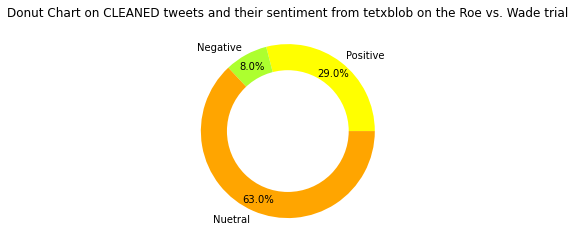

In [19]:
colors = ['#FFFF00', '#ADFF2F', '#FFA500'] #RGB scale color id's
plt.pie(sentiments, colors = colors, labels = sentiment_titles, autopct ="%1.1f%%",pctdistance = 0.85) 

center_circle = plt.Circle((0, 0),0.70,fc='white') # origin at 0,0 size 0.7 and color white
fig = plt.gcf()

fig.gca().add_artist(center_circle) # add circle to the middle

plt.title("Donut Chart on CLEANED tweets and their sentiment from tetxblob on the Roe vs. Wade trial") # title

plt.show()

# Results after cleaning tweets
After cleaning tweets by removing mentions, hashtags and links, the textblob sentiment analysis had the same exact scores of sentiment on the tweets, I had to run my code a couple of times to get a new stream of tweets and it was still giving the same output

# What are the most common words in these tweets?

In [42]:
all_words=[] # initliaze list to hold all words

for tweet in tweets:
    
    tweet_text = tweet.text
    words = re.findall(r"[0-9A-Za-z]+",tweet.text) # create a list of the words in each tweet
    
    for i in range(len(words)):
        all_words.insert(i,words[i]) # insert each tweet's words into the list containing all the words

from collections import Counter

Counter = Counter(all_words)

Counter.most_common(20) # Function in Counter library that prints the 20 most common words and their counts

[('RT', 80),
 ('t', 43),
 ('your', 43),
 ('RoeVsWade', 40),
 ('not', 37),
 ('s', 35),
 ('https', 34),
 ('co', 34),
 ('to', 32),
 ('RoeVWadeprotest', 31),
 ('of', 27),
 ('a', 27),
 ('the', 25),
 ('RoeVWade', 24),
 ('get', 24),
 ('amp', 21),
 ('VegasVisions', 20),
 ('Ladies', 20),
 ('up', 20),
 ('from', 20)]